# Проект: Исследовательский анализ данных объявлений о продаже квартир


  В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.  
  Даступны два вида данных первые внесены пользователмя, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.  
Данные получа из фала /datasets/real_estate_data.csv. исследую фаил на ноличее ошибок, пропусков, проверю на явные и не явные задвоение данных, нестыковок. Оценю степерь влеяния ошибок на оналез данных.  
Следовательно вся работа делится на этапы:  
1) Обзор файл с данными и изучение общий информации
2) Предобработка данных
3) Дополнение таблицы новыми столбцами
4) Проведу исследовательский анализ данных
5) Общий вывод

## Обзор файл с данными и изучение общий информации

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t') # грузим данные из csv файла.

data = df.copy() # делаем копию DF от гриха подальше и далие работаем с копией

display(data.head()) 

data.info()

print('Колличество дубликатов = ',data.duplicated().sum()) # проверяем кол-во дубликатов

display(data.describe()) # выводим общую информацию о датафрейме.
data.dtypes #смотрим типы столбцов


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

 ### **По результатам предворительного анализа данных выяснилось:**  
  1) Есть 100 метровые потолки и 19 комнатные квартиры, надо с этим разбираться (хотя если это дворец - может быть).  
  2) Огромное количество -NaN пропуска данных. (как показать наглядно ещё не знаю)
  3) "Машинные" данные показали себя с не лучшей стороны. 
  4) Типы столбцов тредуют приведения к "нормальному" виду.и т.д.

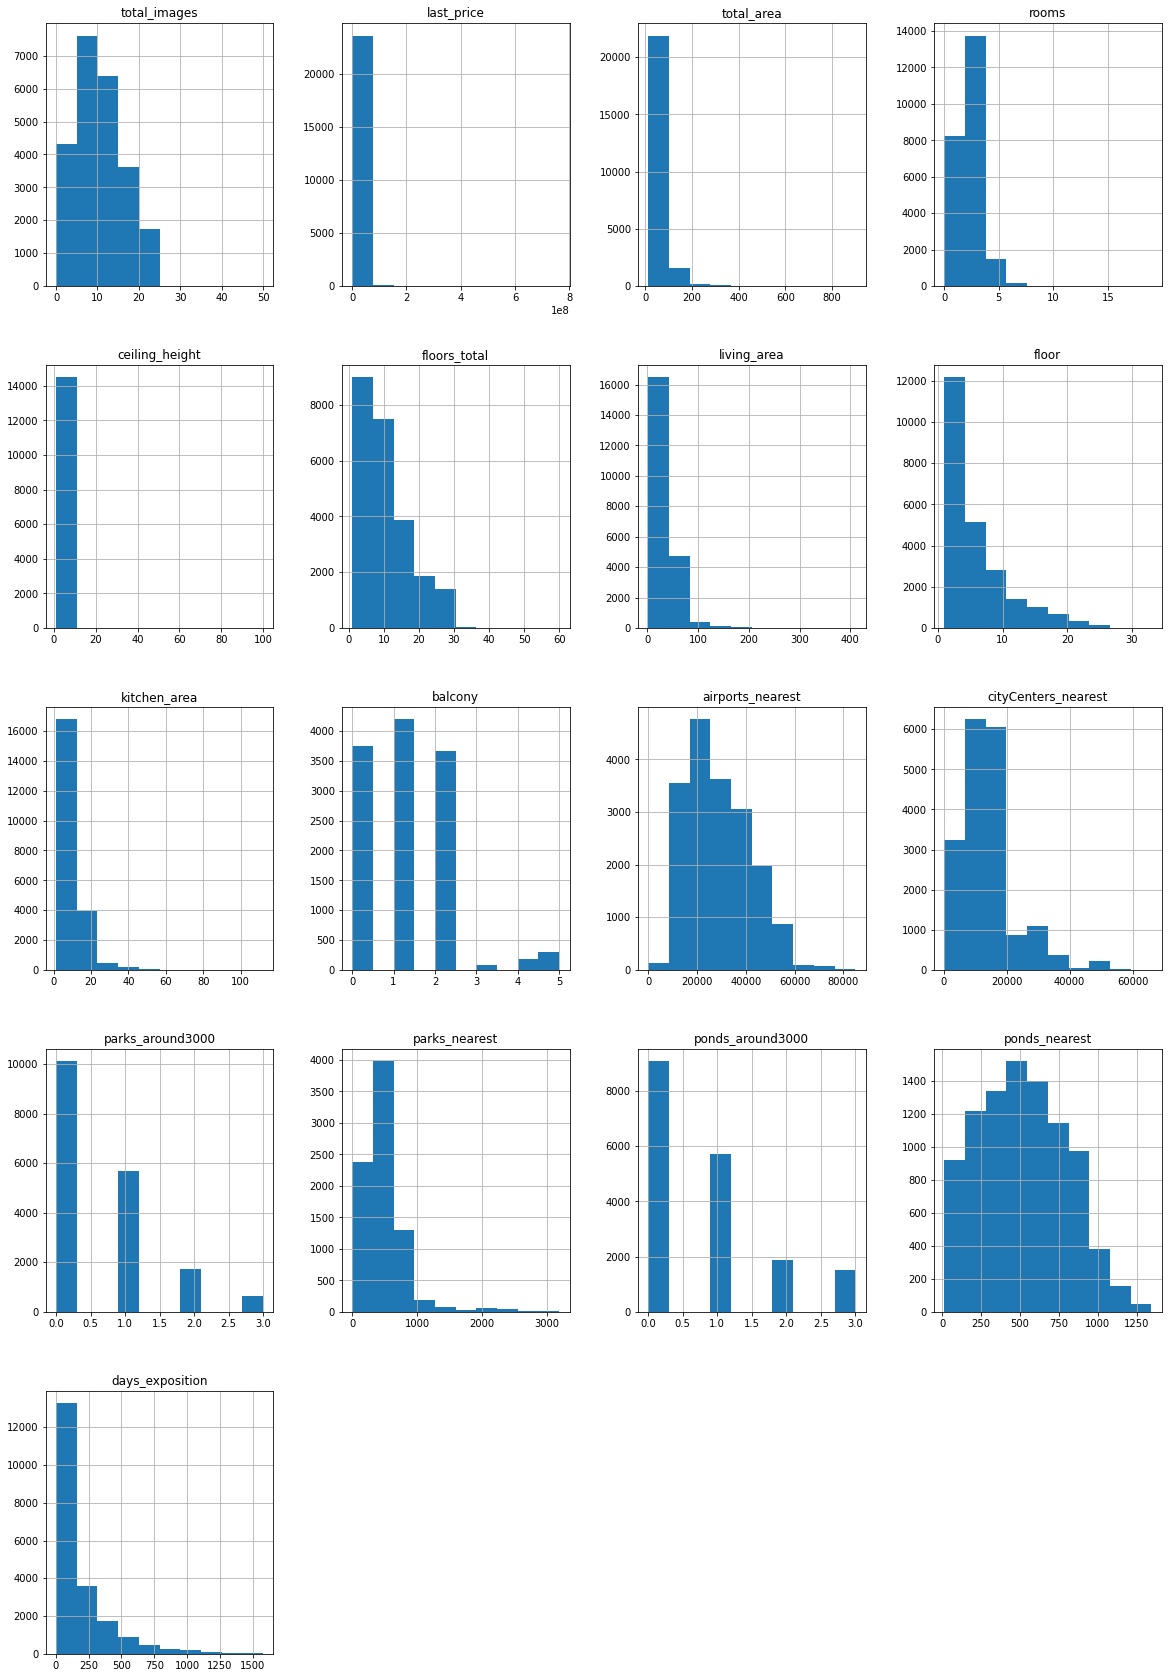

In [3]:
data.hist(figsize=(20, 30))
pass

In [4]:
data.isna().sum() # кол-во пропусков (занчение)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [42]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Вывод:**
1) "**ceiling_height**" - высота потолков довольно важный параметр, попробую предположить что люди не считали важным его заполнить, попробую заполнить средним значение выстоты потолка для данного города.
2) "**is_apartment**" - апартаменты, предположу, что владельцы данного типа недвижимости не задумываются над разнообразием видов, поэтому считаем все строки "is_apartment" = True если значение поля "studio" and "open_plan" = False.
3) "**kitchen_area**" and "living_area" данные, которые могут быть не заполнены просто по той причине, что они необязательны к заполнению, а высчитывать жилую площадь/площадь кухни продавцам некогда. Так же надо выяснить нет ли связи между студиа и отсутвием значения жилая полощадь и площадь кухни. 
4) "**locality_name**" - населенный пункт, очень странное решение не заполнять могу предположить или это машинный сбой или бестолковость продовца не понимающего разницу меджу СПБ и лен. облостью. Можно поппробывать заполнить его данными из поля "гео лакация" если есть или просто удалить так как их очень мало.
5) "**airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000**" - эта самая большая группа незаполненых данных, так как это автоматизированная система заполнения данных то пустые значения позначают что определённом радиусе нет указанных наименований. Поэтому их не трогаем. Но теоретичеки пожно попробывать (пока не знаю как) прикрутить карту и посчитать значения до ближайего парка или аэропорта до центра города.
6) "**balcony**" - возможно это необезательный параметр и у дома может отсутвовать болкон. Хотя предварительный аналез показал наличие здание с 5 балконами (все таки закрался замок надо проверить может это дом с 19 комнатами).
7) "**days_exposition**" - считаем что только что выставили на продажу
8) "**floors_total**"- колличество этажей, надо смотреть.
**Итого:**
**Данные очень "грязные" буду думать и исткать пути как это все поправить.**

**Предобработка данных**

**Изменяем тип данных:**

In [5]:
# меняем тип на требуемый. Пока ещё есть пропуски
columns_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest',  'parks_around3000', 'parks_nearest',  'ponds_nearest', 'days_exposition']

for colum in columns_int:
    data[colum] = data[data[colum].notnull()][colum].astype('int')

# Округляем до десятых.
columns_r1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

for colum_r1 in columns_r1:
    data[colum_r1] = data[data[colum_r1].notnull()][colum_r1].round(1)
    

data['is_apartment'] = data['is_apartment'].astype(bool)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])        # причесываем и перевододи в формат без времени только с датой

#data['days_exposition'] = data['days_exposition'].fillna(0)                        # заполняем нулями кол-во дней в продаже 
data['balcony'] = data['balcony'].fillna(0)                                        # обнуляем незаполненные балконы

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #заполняем медианными значениями незаполнненые значения высоты потолка.


**Смотрим потолки**

In [6]:
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
data['ceiling_height'].isna().sum()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(10) #С высотой потолков беда, значение судя по всему внесены с ошибкой. Буду разбираться позже.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21824,20,2450000,44.0,2019-02-12,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22938,14,4000000,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25.0,17.0,17,True,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
10773,8,3800000,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
20478,11,8000000,45.0,2017-07-18,1,27.0,4.0,22.0,2,True,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
17857,1,3900000,56.0,2017-12-22,3,27.0,5.0,33.0,4,False,...,NaN,0.0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
21377,19,4900000,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22336,19,9999000,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,True,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22869,0,15000000,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [7]:
data.loc[(data['ceiling_height']>10), 'ceiling_height'] = (data['ceiling_height'] / 10)


**Проверяем этажность зданий**

In [8]:
data[data['floors_total'].isna()] # в этажности не вижу не какой закономерности поэтому оставляю без изменений
#data['floors_total'].unique()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,2.6,NaN,30.8,4,True,...,12.0,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,2.6,NaN,20.8,1,True,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,2.6,NaN,38.4,12,True,...,10.6,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,2.6,NaN,47.1,8,True,...,16.8,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,2.6,NaN,NaN,9,True,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,True,...,NaN,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,2.6,NaN,31.7,20,True,...,14.4,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,2.6,NaN,45.4,6,True,...,23.4,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,2.6,NaN,50.4,18,True,...,23.6,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [9]:
city_name = ['городской поселок', 'поселок городского типа', 'городской поселок', 'гпоселок', 'село', 
               'попоселок', 'попоселокк', 'коттеджный поселок', 'садовое товарищество', 'поселок', 'поселокк', 'поселок станции']

for city in city_name:
    data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace([city], 'поселок', regex=True)
    )                                                                              # причесываем, убираем, дубликаты названий в столбце "locality_name"

#data['locality_name'].unique()

Дубликаты из поля 'locality_name' убраны. Судя по колличесту и разнообразию населённых пунктов, пользователи вводят их вручную, рекомендую настроить автоматическую замени или автоподстановку.

**Итого:**  
**Поменяли тип данных, заполнили пропуски где это необходимо, убрали дубликаты.**

 **Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:**
1) **цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);**
2) **день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);**
3) **месяц публикации объявления;**
4) **год публикации объявления;**
5) **тип этажа квартиры (значения — «первый», «последний», «другой»);**
6) **расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).**

In [10]:
data['price_onr_metr'] = data['last_price']/data['total_area']
data['price_onr_metr'] = data['price_onr_metr'].round(2)


In [11]:
data[data['locality_name']== 'Гатчина'].query('ceiling_height == ceiling_height') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_onr_metr
47,17,3600000,56.1,2018-10-18,3,2.6,4.0,42.5,3,True,...,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0,64171.12
64,13,3100000,44.3,2017-11-07,2,2.5,5.0,29.0,5,True,...,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,143.0,69977.43
174,8,2100000,31.6,2018-10-16,1,2.6,5.0,17.5,4,True,...,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,37.0,66455.70
298,9,2650000,42.8,2017-04-25,2,2.6,5.0,30.0,3,True,...,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.0,61915.89
355,17,3600000,55.2,2018-07-12,2,2.5,5.0,32.0,2,False,...,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,65217.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23346,3,2300000,34.0,2016-06-17,1,2.6,13.0,16.0,13,False,...,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,197.0,67647.06
23453,5,3000000,55.5,2016-04-13,3,2.6,5.0,37.2,3,False,...,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,161.0,54054.05
23477,3,1450000,138.0,2018-07-06,3,2.6,2.0,58.0,2,True,...,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,52.0,10507.25
23530,0,3000000,30.0,2018-03-28,1,2.6,5.0,NaN,3,True,...,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,45.0,100000.00


In [12]:
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month    # новый столбец с значением месяца
data['years_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year     # новый столбец с значением года

data['day_of_the_week'] = data['first_day_exposition'].apply(lambda x: x.weekday()) # новый столбец с пересчетом и кодировкой дня недели

# меняем кодированные значение дней недели на текстовые.
dict_of_weekdays = {0: 'понедельник', 1: 'вторник', 2: 'среда', 3: 'четверг', 
                    4: 'пятница', 5: 'суббота', 6: 'воскресенье'}

data['day_of_the_week'] = data['day_of_the_week'].map(dict_of_weekdays)


#### Этажность

In [13]:

def floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    

data['level'] = data.apply(floor, axis = 1)

**Расстояние до центра города переведите метры в км и округляем**

In [14]:
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round() 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот раздел выполнен качественно
</div>

## **Шаг 4. Проведите исследовательский анализ данных:**

count    23699.000000
mean        60.348635
std         35.654086
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


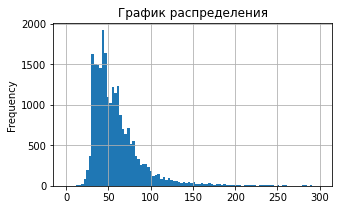

In [15]:
print(data['total_area'].describe())
pass
data['total_area'].plot(xlabel='Общая площадь', ylabel='Кол-во',
                        kind='hist',
                        bins = 100,
                        grid=True,
                        figsize = (5,3),
                        range = (0,300),
                        title='График распределения',
                      );

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь метод range() для определения пиковых значений
</div>

**Распределение параметра "Общая площадь" нормальное есть анамальные значение но они их не много и существенного влияния не оказывают**

count    21796.000000
mean        34.457878
std         22.030420
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


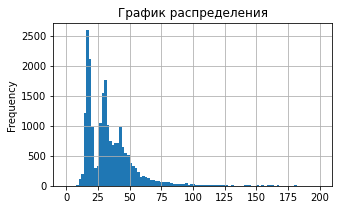

In [16]:
print(data['living_area'].describe())
data['living_area'].plot(xlabel='Жилая площадь', ylabel='Кол-во',
                        kind='hist',
                        bins = 100,
                        grid=True,
                        figsize = (5,3),
                        range = (0,200),
                        title='График распределения',
                      )
pass

**Распределение значения "Жилая площадь" похоже на параметр "Общая площадь". Есть анамальные значения но их мало и игнорирование их не повлияет на объективность данных.**

count    21421.000000
mean        10.569754
std          5.905448
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


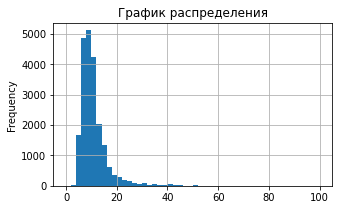

In [17]:
print(data['kitchen_area'].describe())
data['kitchen_area'].plot(xlabel='Площадь кухни', ylabel='Кол-во',
                        kind='hist',
                        bins = 50,
                        grid=True,
                        figsize = (5,3),
                        range = (0,100),
                        title='График распределения',
                      )
pass

**Площадь кухни таже поддается логике, хоть есть и невероятные 112 метров но они не оказывают существенного влияния но общую картину.**

In [18]:
data['last_price']  = (data[data['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int) #приводим к более удобнову виду

count     23699.000000
mean       6541.548800
std       10887.012837
min          12.000000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64


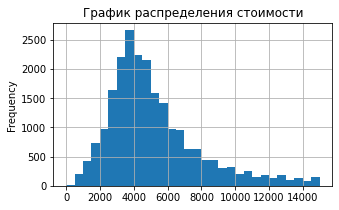

In [19]:
print(data['last_price'].describe())
data['last_price'].plot(xlabel='Цена', ylabel='Кол-во',
                        kind='hist',
                        bins = 30,
                        grid=True,
                        figsize = (5,3),
                        range = (0,15000),
                        title='График распределения стоимости',
                      )
pass

**Стоимость распределяется вполне ожидаемо максимальное колличество обьявнений о продаже в среднем ценовом диапозоне.**

count    23699.000000
mean         2.680980
std          0.243404
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64


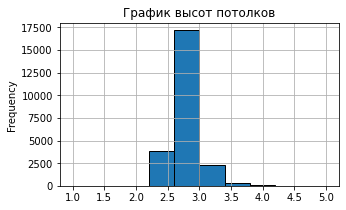

In [20]:
print(data['ceiling_height'].describe())
data['ceiling_height'].plot(xlabel='Высота потолка', ylabel='Кол-во',
                        kind='hist',
                        bins = 10,
                        grid=True,
                        figsize = (5,3),
                        range = (1,5),
                        title='График высот потолков',
                        edgecolor='black'
                      )
pass

**Высота потолков тоже не удивила, можно предположить что приобладают типовые виды недвижимости.**

count    23699.000000
mean        60.348635
std         35.654086
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


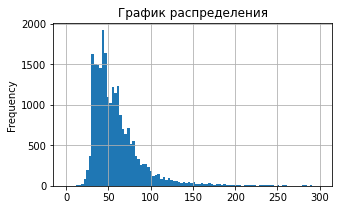

In [21]:
print(data['total_area'].describe())
pass
data['total_area'].plot(xlabel='Общая площадь', ylabel='Кол-во',
                        kind='hist',
                        bins = 100,
                        grid=True,
                        figsize = (5,3),
                        range = (0,300),
                        title='График распределения',
                      );

**Общая площадь подтвердила предположение о приобладании типового жилья, максимальное кол-во оъявлений находится от 35 до 70 кв.м**

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


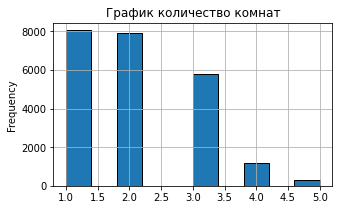

In [22]:
print(data['rooms'].describe())
data['rooms'].plot(xlabel='кол-во комнат', ylabel='Кол-во',
                        kind='hist',
                        bins = 10,
                        grid=True,
                        figsize = (5,3),
                        range = (1,5),
                        title='График количество комнат',
                        edgecolor='black'
                      )
pass

**На графики видно что максимальное кол-во это однокомнатные и это подтверждает стоимость и прощадь, следом двух комнатные и завершает тройку с существенным снижение результата трех комнатные.**

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


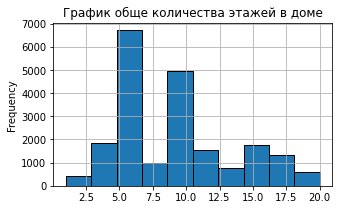

In [23]:
print(data['floors_total'].describe())
data['floors_total'].plot(xlabel='общее кол-во этажей в доме', ylabel='Кол-во',
                        kind='hist',
                        bins = 10,
                        grid=True,
                        figsize = (5,3),
                        range = (1,20),
                        title='График обще количества этажей в доме',
                        edgecolor='black'
                      )
pass

**Можно предположить что продоют воскновном квартири в многоэтажных домах, времен советской постройки.**

count    18180.000000
mean        14.184818
std          8.616194
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64


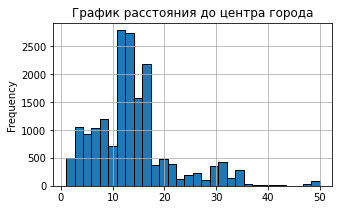

In [24]:
print(data['cityCenters_nearest'].describe())
data['cityCenters_nearest'].plot(xlabel='расстояние до центра города', ylabel='Кол-во',
                        kind='hist',
                        bins = 30,
                        grid=True,
                        figsize = (5,3),
                        range = (1,50),
                        title='График расстояния до центра города',
                        edgecolor='black'
                      )
pass

**Оснавная недвижимость продается в спальных районах.**

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


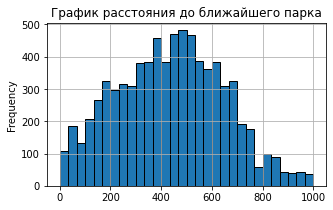

In [25]:
print(data['parks_nearest'].describe())
data['parks_nearest'].plot(xlabel='расстояние до ближайшего парка', ylabel='Кол-во',
                        kind='hist',
                        bins = 30,
                        grid=True,
                        figsize = (5,3),
                        range = (1,1000),
                        title='График расстояния до ближайшего парка',
                        edgecolor='black'
                            )
pass

**Самые многочисленные обьявлении о продаже находятся на удалении от 300 до 700 метром от парка.**

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


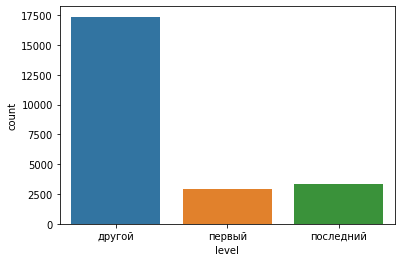

In [26]:
print(data['parks_nearest'].describe())
sns.countplot(data=data, x='level')
pass

**По имеющимся данным коих давольно мало мы видим что преобладает не первый и последний этаж, но данные не полные и ситуация может изменится с учетом одноэтажного и частного жилищного фонда. Можно предположить что продовци частного жилья не указывали этажность.**

# Изучите, как быстро продавались квартиры (столбец days_exposition).
  Этот параметр показывает, сколько дней было размещено каждое объявление.
    Постройте гистограмму.
  Посчитайте среднее и медиану.
  В ячейке типа markdown опишите, сколько времени обычно занимает продажа.
  Какие продажи можно считать быстрыми, а какие — необычно долгими?

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


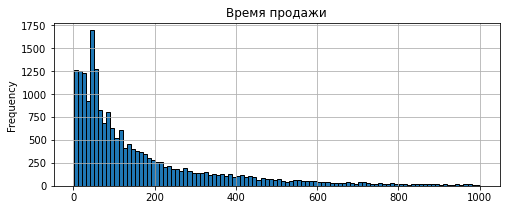

In [27]:
print(data['days_exposition'].describe())
data['days_exposition'].plot(xlabel='Срок продажи', ylabel='Кол-во',
                        kind='hist',
                        bins = 100,
                        grid=True,
                        figsize = (8,3),
                        range = (1,1000),
                        title='Время продажи',
                        edgecolor='black'
                            )
pass


**Из графика и полученных данных видно что среднее время продажи 180 дней хотя медианное состовляет 95 дней, очевидно что "проблемное" жильё сильно усредняет время. 
Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались до года**
 


 построим Violin plot

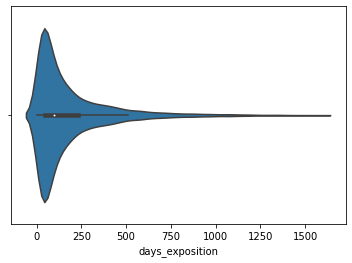

In [28]:
sns.violinplot(x=data['days_exposition'])
pass

**Ограничу срок продажи 500 днями, чтоб убрать выбросы. Посмотрим на данные более детально:**

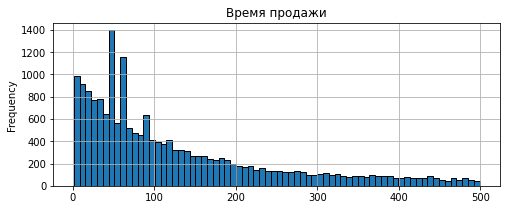

In [29]:
data.query('days_exposition<500')['days_exposition'].plot(xlabel='Срок продажи до  500 дней', ylabel='Кол-во',
                        kind='hist',
                        bins = 70,
                        grid=True,
                        figsize = (8,3),
                        title='Время продажи',
                        edgecolor='black'
                            )
pass

**Чаще всего квартиры продаются в срок от 45 до 60 дней их можно считать быстрыми продажами, а вот от 200 и далее можно считать долгими.
смущает наличие пиков**

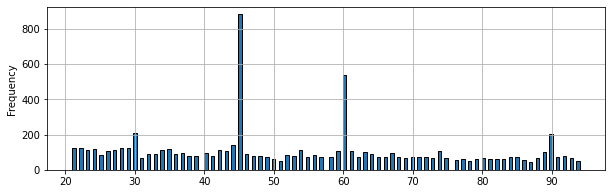

In [30]:
data.query('20<days_exposition<95')['days_exposition'].plot(kind='hist', bins=150, figsize=(10,3), edgecolor='black', grid=True)
pass

**Основтные пики каждые 15 дней 30-45-60-75-90, сладывается ощущение что оператор проверяет статус недвижимасти раз в 15 дней.**

# **Какие факторы больше всего влияют на общую (полную) стоимость объекта?**
  Изучите, зависит ли цена от:
1) общей площади;
2) жилой площади;
3) площади кухни;
4) количества комнат;
5) этажа, на котором расположена квартира (первый, последний, другой);
6) даты размещения (день недели, месяц, год).
) Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

### Зависимость стоимости от общей площади

0.6536750004256715

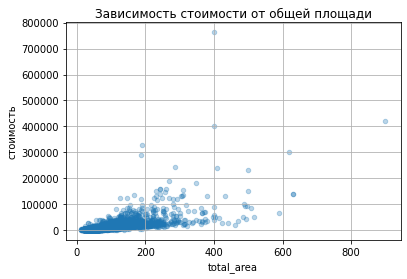

In [31]:
#pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
#pivot_table_total_area.columns = ['mean', 'count', 'median']
#pivot_table_total_area.query('count > 50').plot(kind = 'scatter', x = 'mean', y = 'median', xlabel='Общая площадь', title = 'Зависимость стоимости от общей площади', grid=True,)

data.plot(kind = 'scatter', y = 'last_price', x ='total_area' , alpha = 0.3,  ylabel = 'стоимость', title = 'Зависимость стоимости от общей площади', grid=True,)

pass
data['last_price'].corr(data['total_area'])

**Чем больше площадь тем дороже недвижимость. Давольноровная корреляция, есть небольшое откланение в сторону не стандартного жилья**

**Зависимость стоимости от жилой площади**

0.9395375885559856

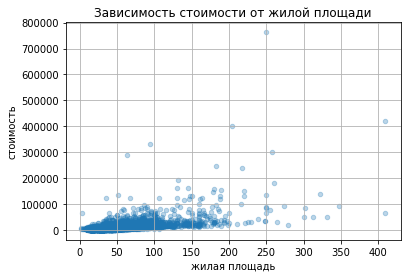

In [32]:
#pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean','count','median'])
#pivot_table_living_area.columns = ['mean','count','median']
#pivot_table_living_area.query('count>50').plot(kind = 'scatter', x = 'mean', y='median',xlabel='Жилая площадь', title = 'Зависимость стоимости от жилой площади', grid=True)
data.plot(kind = 'scatter', x = 'living_area', y ='last_price' , alpha = 0.3, ylabel = 'стоимость', xlabel='жилая площадь', title = 'Зависимость стоимости от жилой площади', grid=True)
pass
data['living_area'].corr(data['total_area'])

**Давльно четкая зависимость прослеживатся, входит в тройку параметров которые оказывают влияние на стоимость жилья.**

**Зависимость стоимости от площади кухни**

0.609124111091552

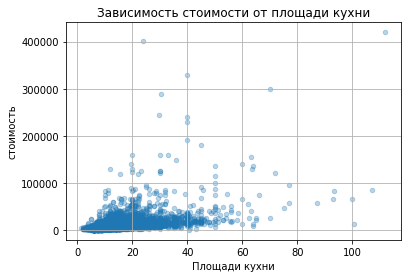

In [33]:
#pivot_table_living_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean','count','median'])
#pivot_table_living_area.columns = ['mean','count','median']
#pivot_table_living_area.query('count>50').plot(kind = 'scatter', x = 'mean', y='median',xlabel='Площади кухни', title = 'Зависимость стоимости от площади кухни', grid=True)
data.plot(kind = 'scatter', x = 'kitchen_area', y ='last_price' , alpha = 0.3,  ylabel = 'стоимость', xlabel='Площади кухни', title = 'Зависимость стоимости от площади кухни', grid=True)
pass
data['kitchen_area'].corr(data['total_area'])

**Пик в районе 16-18 метров видимо вызван сроительством новостроик с большим значением общей площади. Хвост с S=40м2 и более это похоже на комуналку.**

**Зависимость стоимости от количества комнат;**

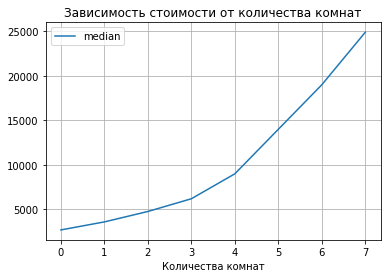

In [34]:
pivot_table_living_area = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean','count','median'])
pivot_table_living_area.columns = ['mean','count','median']
pivot_table_living_area.query('count>50').plot( y='median',xlabel='Количества комнат', title = 'Зависимость стоимости от количества комнат', grid=True)
pass

**Чем больше комнат, тем выше цена - так продолжается до 7 комнат. Далее - единичные значения (выбросы). Вполне возможно, что дальше идут бывшие коммуналки или замки на продажу?**

**Зависимость стоимости от этажа;**

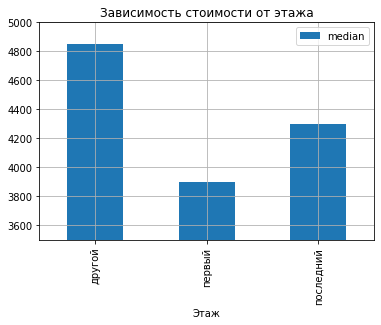

In [35]:
pivot_table_living_area = data.pivot_table(index = 'level', values = 'last_price', aggfunc = ['mean','count','median'])
pivot_table_living_area.columns = ['mean','count','median']
pivot_table_living_area.query('count>50').plot(kind='bar', y='median',xlabel='Этаж', title = 'Зависимость стоимости от этажа', grid=True, ylim=(3500, 5000))
pass

#### Ожидаемо самый дешевый это первый этаж. На последнем этаже, конечно, подороже, чем на первом, но дешевле чем на других.

**Зависимость стоимости от года**

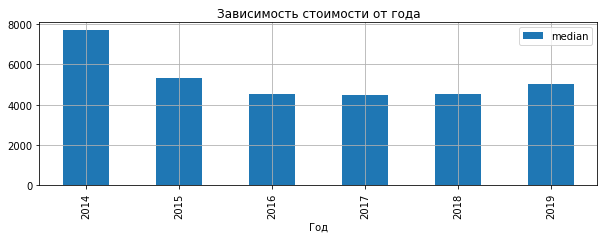

In [36]:
pivot_table_living_area = data.pivot_table(index = 'years_publication', values = 'last_price', aggfunc = ['mean','count','median'])
pivot_table_living_area.columns = ['mean','count','median']
pivot_table_living_area.query('count>50').plot(kind='bar',y='median',xlabel='Год',  title = 'Зависимость стоимости от года', grid=True,figsize=(10,3))
pass



**Устойчевое падение вплоть до 2017 года сменилось неуверенным ростом.**

**Зависимость стоимости от месяца**

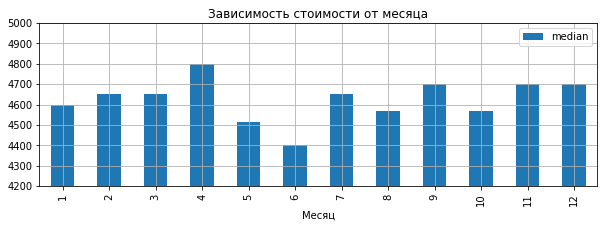

In [37]:
pivot_table_living_area = data.pivot_table(index = 'month_publication', values = 'last_price', aggfunc = ['mean','count','median'])
pivot_table_living_area.columns = ['mean','count','median']
pivot_table_living_area.query('count>50').plot(kind='bar',y='median',xlabel='Месяц',  title = 'Зависимость стоимости от месяца', grid=True, ylim=(4200, 5000),figsize=(10,3))
pass

**Наблюдается давльно явная сезонность летом снижается возможно из-за спроса, можно предоположить что март это месяц выплаты годовых бонусов и как следсвите первоночальный взнос на ипотеку. Как вариант.**

**Зависимость стоимости от дня недели**

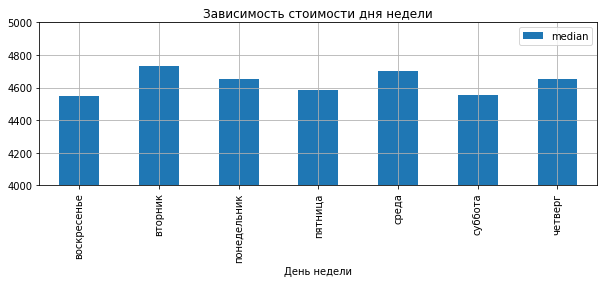

In [38]:
pivot_table_living_area = data.pivot_table(index = 'day_of_the_week', values = 'last_price', aggfunc = ['mean','count','median'])
pivot_table_living_area.columns = ['mean','count','median']
pivot_table_living_area.query('count>50').plot(kind='bar',y='median',xlabel='День недели',  title = 'Зависимость стоимости дня недели', grid=True, ylim=(4000, 5000), figsize=(10,3))
pass


**Зависимость цены от дня недели публикации практически никак не зависит.**  
  **Единственное, что можно сказать, так это то, что в среднем цены на квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена на квартиры с объявлениями, опубликованными в выходные дни.**

**Посчитайте среднюю цену**  
  одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [39]:
lac_pivot_table = data.pivot_table(index='locality_name', values='price_onr_metr', aggfunc =['count', 'median'])
lac_pivot_table.columns = ['count', 'Средняя цена за кв.м']
lac_pivot_table = lac_pivot_table.sort_values('count', ascending = False).head(10)

display(lac_pivot_table)                                                                    #десяток с наибольшем кол-вом записе

display(lac_pivot_table[lac_pivot_table['Средняя цена за кв.м'] == lac_pivot_table['Средняя цена за кв.м'].max()].round(1)) #самая высокая стоимость

lac_pivot_table[lac_pivot_table['Средняя цена за кв.м']==lac_pivot_table['Средняя цена за кв.м'].min()].round(1)            #самая низкая стоимость

,count,Средняя цена за кв.м
locality_name,,
Санкт-Петербург,15721,104761.900
поселок Мурино,556,85890.220
поселок Шушары,440,76876.175
Всеволожск,398,65789.470
Пушкин,369,100000.000
Колпино,338,74723.745
поселок Парголово,327,91642.860
Гатчина,307,67796.610
деревня Кудрово,299,91860.470


,count,Средняя цена за кв.м
locality_name,,
Санкт-Петербург,15721,104761.9


,count,Средняя цена за кв.м
locality_name,,
Выборг,237,58158.3


**Самая высокая стоимость квадратного метра в СПБ и составляе 114849.0, а самая низкая в Выборге и равна 58141.8**

**Ранее вы посчитали расстояние до центра в километрах.** 
1) Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.
2) Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

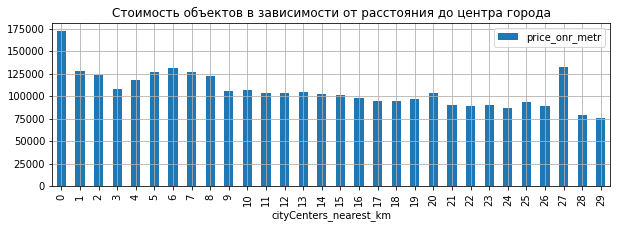

In [40]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999) # убрал пустышки 
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_onr_metr', aggfunc = 'median')
pivot_table_km.plot(kind='bar', grid=True, figsize=(10,3), title = 'Cтоимость объектов в зависимости от расстояния до центра города')
pass


***Вполне ожидаемо что в радиусе 1 км медианная цена принемает максимальное значение. Если анализировать граффик но центр ограничен 8 км, на этом значении происходит значительный спад без последующего увеличения значения. Так же интересные значение 4-7 км уровень стоимость крайне высок для такого удаления, предположу что есть "элитные районы", которые находятся не некотом оттдолении от центра.***

**Шаг 5. Напишите общий вывод**  
Опишите полученные результаты и зафиксируйте итоговый вывод проведённого исследования.

Из данных выше, мы можем сказать, что сильнее всего цена на квартиру зависит от цены за квадратный метр (практически очевидно), от общей площади квартиры (чем больше площадь, тем выше стоимость), от общей площади, жилой площади и площади кухни, а также от количества комнат. Небольшое влияние оказывает присутствие парков/водоемов рядом.
Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Ожидаемо но надо более тщательно изучать лакацию по которой предоставленны данные. Таким же образом небольшое влияние оказывает удаленность от аэропорта.
Многие из этих параметров оказывают довольно слабое влияние, но если попробовать их объединить в одну группу, то, наверняка, можно будет построить хорошую предсказательную модел.  
**Подтверждение моего предположения доказывает коллеляция Пирсона.**

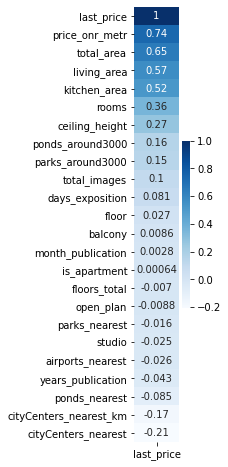

In [41]:
data_corr = data.copy()
data_corr = data_corr.drop(columns = (['day_of_the_week','level', 'locality_name']) )
plt.figure(figsize=(1,8))
sns.heatmap(data_corr.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", 
            annot=True,)
pass